<a href="https://colab.research.google.com/github/JJay-Chao/Data-Science-team-17/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import fbprophet
from fbprophet import Prophet
print(fbprophet.__version__)
from fbprophet.plot import plot_plotly
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

0.7.1


In [39]:
def read_train():
    downloaded = drive.CreateFile({'id':"1L2NR2qDWWDHfNyQMIH7oelzIRuY9aum6"})   # replace the id with id of file you want to access
    downloaded.GetContentFile('train_2.csv')  
    train=pd.read_csv('train_2.csv',sep=',',header=None,encoding="utf-8");
    return train;

In [37]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [40]:
train=read_train();

INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1L2NR2qDWWDHfNyQMIH7oelzIRuY9aum6?alt=json
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,2

In [4]:
df = pd.read_csv('sample_data/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1163,2018-09-06
1164,2018-09-07
1165,2018-09-08
1166,2018-09-09
1167,2018-09-10


In [65]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1163,2018-09-06,23.102122,-9.845581,57.503271
1164,2018-09-07,24.589281,-8.638681,57.491210
1165,2018-09-08,24.333107,-4.124844,56.179419
1166,2018-09-09,23.896235,-8.134688,54.404906
1167,2018-09-10,20.643440,-13.631091,51.092101


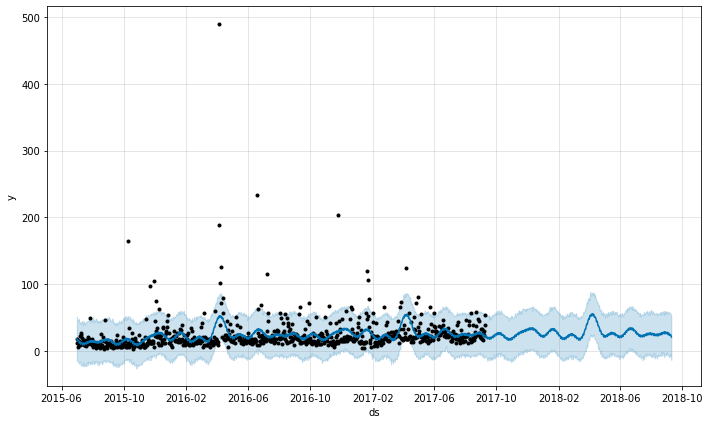

In [66]:
fig1 = m.plot(forecast)

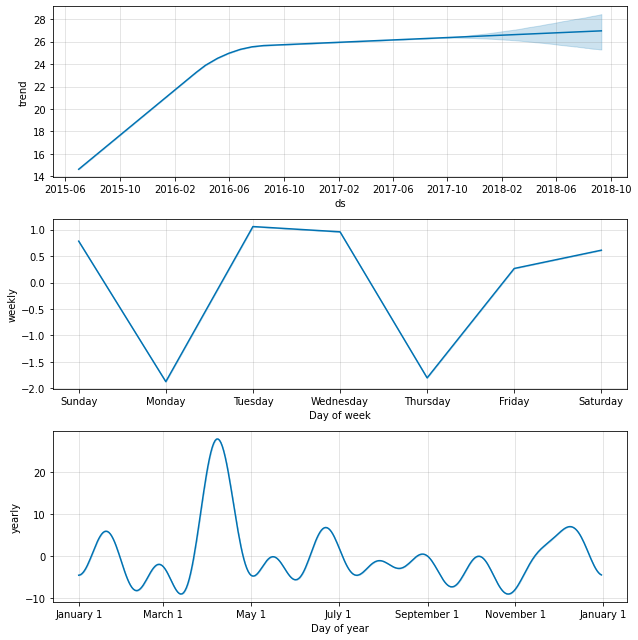

In [67]:
fig2 = m.plot_components(forecast)

In [68]:
from fbprophet.plot import plot_components_plotly
plot_plotly(m, forecast)

In [69]:
plot_components_plotly(m, forecast)

In [70]:
!pip install PyDrive

In [13]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [14]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [43]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803
0,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
1,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,24,19,10,14,15,8,16,8,8,16,7,11,10,20,18,15,14,49,10,16,18,8,5,9,7,13,9,7,4,11,...,46,24,22,22,11,25,45,39,17,18,13,57,18,14,19,39,22,16,28,21,37,58,25,23,25,47,44,26,24,21,19,33,33,18,16,27,29,23,54,38
2,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,4,41,65,57,38,20,62,44,15,10,47,24,17,22,9,39,13,11,12,21,19,9,15,33,8,8,7,13,2,23,...,39,20,31,19,7,11,20,13,16,16,47,21,20,12,13,20,22,20,12,37,14,34,16,31,34,33,32,29,34,25,32,30,11,19,54,25,26,23,13,81
3,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,4,1,1,1,6,8,6,4,5,1,2,3,8,8,6,6,2,2,3,2,4,3,3,5,3,5,4,2,5,1,...,22,8,4,3,1,3,7,3,1,9,4,2,6,3,3,3,8,2,4,3,6,23,11,8,6,13,12,8,12,9,6,6,7,2,4,7,3,4,7,6
4,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,16,16,11,23,145,14,17,85,4,30,22,9,10,11,7,7,11,9,11,44,8,14,19,10,17,17,10,7,10,1,...,37,14,12,13,11,10,14,15,15,11,19,9,19,8,17,11,18,20,11,11,21,42,23,17,11,21,20,20,110,15,7,19,19,9,6,16,19,30,38,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145059,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3,2,3,4,3,2,2,0,3,1,1,0,2,2,1,6,2,3,3,2,7,6,8,5,7,7,7,8,2,0,4,3,6,5,2,4,4,8,2
145060,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,6,1,2,3,3,18,4,5,3,2,1,3,2,1,2,2,2,1,3,9,10,8,6,3,9,2,11,3,3,4,4,7,5,0,5,5,2,2,4
145061,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,11,9,10,11,13,7,8,13,8,14,4,10,8,8,13,14,7,5,9,9,16,10,12,10,13,10,21,11,9,11,25,22,47,42,13,9,21,16,6
145062,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,17,3,4,5,1,4,2,12,3,1,3,4,1,3,4,0,5,8,0,1,10,10,11,3,10,5,3,9,2,4,6,5,1,5,8,2,4,3,3


In [44]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [63]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
df1 = train.T

In [58]:
df2=df1.rename(columns={0: 'ds', 1: "y"}).drop([0])

In [61]:
df2=df2[['ds','y']]

In [62]:
df2

,ds,y
1,2015-07-01,18
2,2015-07-02,11
3,2015-07-03,5
4,2015-07-04,13
5,2015-07-05,14
...,...,...
799,2017-09-06,27
800,2017-09-07,29
801,2017-09-08,23
802,2017-09-09,54
